In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

## Loding Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/project/match.csv')
data

,match_id,inning,player_id,player,bat_inning,ball_inning,ball_faced,run_scored,4s,6s,...,100s,ball_delivered,run_given,wicket,catch,stump,run_out,dismissed_by,dismissal_type,dream11_score
0,1,0,123,DA Warner,1,0,9,14,2,1,...,0,0,0,0,2,0,0,A Choudhary,caught,34
1,1,0,427,S Dhawan,1,0,31,40,5,0,...,0,0,0,0,0,0,0,STR Binny,caught,45
2,1,0,293,MC Henriques,1,1,37,52,3,2,...,0,13,20,1,2,0,0,YS Chahal,caught,106
3,1,0,562,Yuvraj Singh,1,0,30,62,7,3,...,0,0,0,0,2,0,0,TS Mills,bowled,99
4,1,0,131,DJ Hooda,1,1,12,16,0,1,...,0,6,7,1,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13671,636,1,190,Iqbal Abdulla,1,1,2,4,1,0,...,0,6,10,0,1,0,0,0,0,9
13672,636,1,558,YS Chahal,0,1,0,0,0,0,...,0,24,36,1,2,0,0,0,0,39
13673,636,1,483,SR Watson,1,1,9,11,0,1,...,0,26,61,0,1,0,0,Mustafizur Rahman,caught,15
13674,636,1,102,CH Gayle,1,1,41,76,4,8,...,0,20,24,0,0,0,0,BCJ Cutting,caught,104


## Printing the Data Head

In [ ]:
data.head(10)

,match_id,inning,player_id,player,bat_inning,ball_inning,ball_faced,run_scored,4s,6s,...,100s,ball_delivered,run_given,wicket,catch,stump,run_out,dismissed_by,dismissal_type,dream11_score
0,1,0,123,DA Warner,1,0,9,14,2,1,...,0,0,0,0,2,0,0,A Choudhary,caught,34
1,1,0,427,S Dhawan,1,0,31,40,5,0,...,0,0,0,0,0,0,0,STR Binny,caught,45
2,1,0,293,MC Henriques,1,1,37,52,3,2,...,0,13,20,1,2,0,0,YS Chahal,caught,106
3,1,0,562,Yuvraj Singh,1,0,30,62,7,3,...,0,0,0,0,2,0,0,TS Mills,bowled,99
4,1,0,131,DJ Hooda,1,1,12,16,0,1,...,0,6,7,1,0,0,0,0,0,43
5,1,0,83,BCJ Cutting,1,1,6,16,0,2,...,0,24,35,0,0,0,0,0,0,20
6,1,0,106,CJ Jordan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,92,Bipul Sharma,0,1,0,0,0,0,...,0,6,4,1,0,0,0,0,0,29
8,1,0,420,Rashid Khan,0,1,0,0,0,0,...,0,24,36,2,0,0,0,0,0,48
9,1,0,72,B Kumar,0,1,0,0,0,0,...,0,25,28,2,0,0,0,0,0,50


## Describeing the dataset

In [ ]:
data.describe()

,match_id,inning,player_id,bat_inning,ball_inning,ball_faced,run_scored,4s,6s,50s,100s,ball_delivered,run_given,wicket,catch,stump,run_out,dream11_score
count,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.0,13676.000000
mean,318.628693,0.496783,289.935946,0.695744,0.553598,11.001755,13.449035,1.245467,0.476967,0.066540,0.003437,11.001755,14.208394,0.517988,0.319757,0.017768,0.0,30.782246
std,183.880585,0.500008,162.460636,0.460108,0.497137,13.687705,19.434885,2.085818,1.093900,0.249233,0.058524,10.995615,14.997643,0.891749,0.583421,0.150242,0.0,31.073542
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-12.000000
25%,159.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.000000
50%,319.000000,0.000000,297.000000,1.000000,1.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,7.000000,12.000000,0.000000,0.000000,0.000000,0.0,25.000000
75%,478.000000,1.000000,424.000000,1.000000,1.000000,17.000000,20.000000,2.000000,0.000000,0.000000,0.000000,24.000000,27.000000,1.000000,1.000000,0.000000,0.0,48.000000
max,636.000000,1.000000,563.000000,1.000000,1.000000,77.000000,175.000000,19.000000,17.000000,1.000000,1.000000,34.000000,66.000000,6.000000,5.000000,3.000000,0.0,290.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13676 entries, 0 to 13675
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   match_id        13676 non-null  int64 
 1   inning          13676 non-null  int64 
 2   player_id       13676 non-null  int64 
 3   player          13676 non-null  object
 4   bat_inning      13676 non-null  int64 
 5   ball_inning     13676 non-null  int64 
 6   ball_faced      13676 non-null  int64 
 7   run_scored      13676 non-null  int64 
 8   4s              13676 non-null  int64 
 9   6s              13676 non-null  int64 
 10  50s             13676 non-null  int64 
 11  100s            13676 non-null  int64 
 12  ball_delivered  13676 non-null  int64 
 13  run_given       13676 non-null  int64 
 14  wicket          13676 non-null  int64 
 15  catch           13676 non-null  int64 
 16  stump           13676 non-null  int64 
 17  run_out         13676 non-null  int64 
 18  dismis

## **Ploting** Runs Scored vs Balls Faced

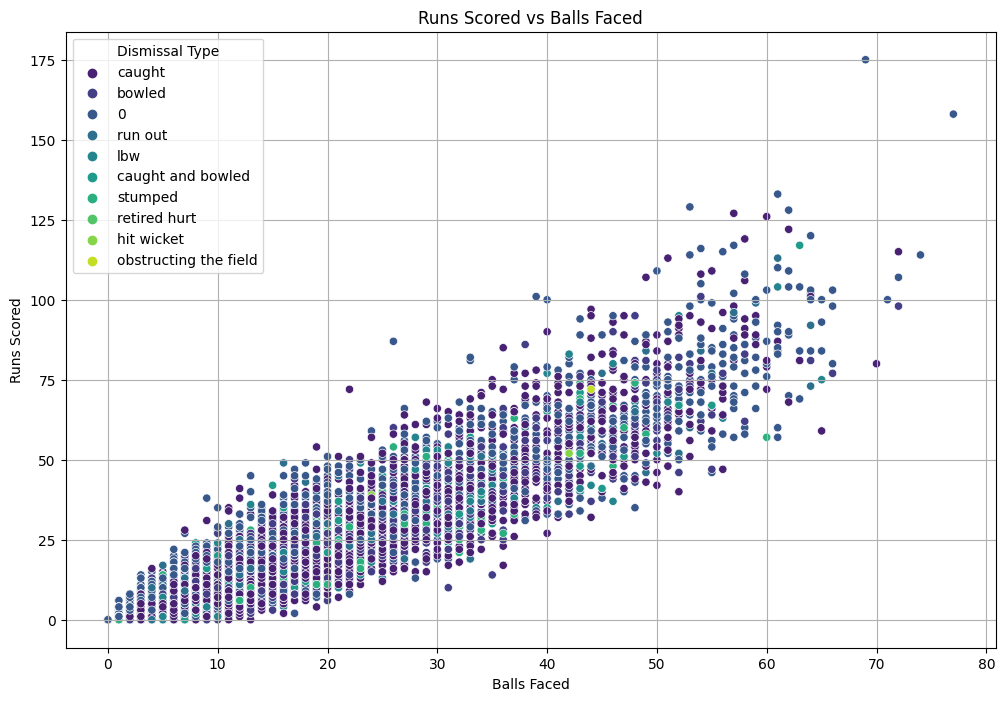

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=data, x='ball_faced', y='run_scored', hue='dismissal_type', palette='viridis')
plt.title('Runs Scored vs Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.legend(title='Dismissal Type')

plt.grid(True)
plt.show()

## **Ploting** Pairplot of Runs Scored, Balls Faced, 4s, 6s, and Dream11 Score

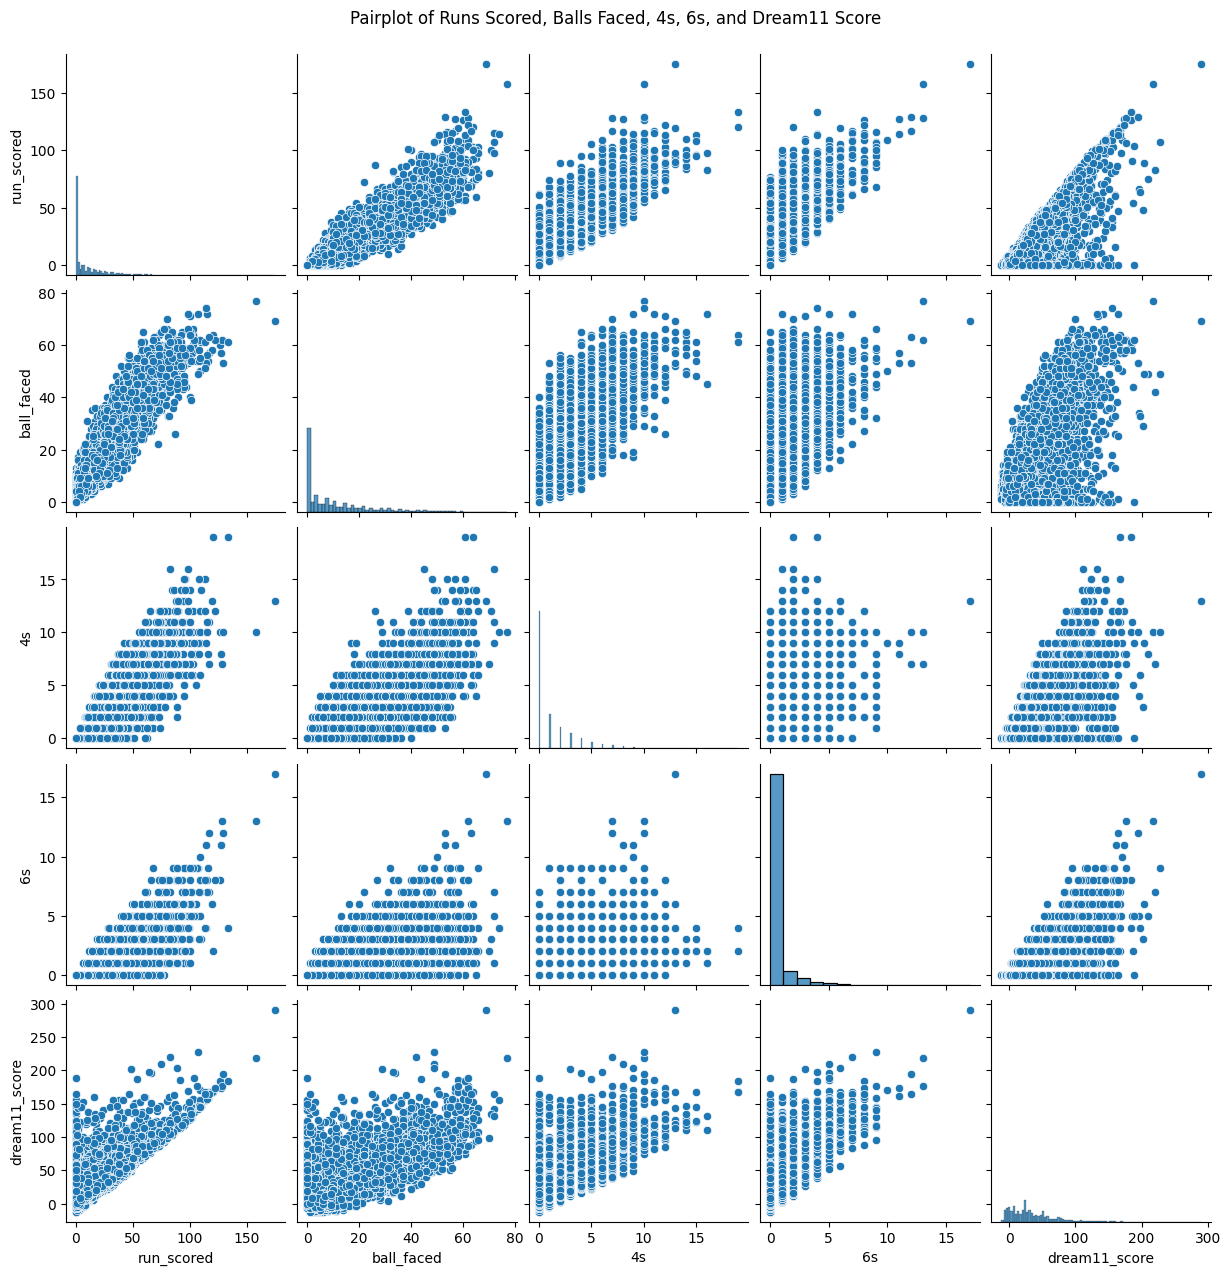

In [ ]:
pairplot_data = data[['run_scored', 'ball_faced', '4s', '6s', 'dream11_score']]

sns.pairplot(pairplot_data)
plt.suptitle('Pairplot of Runs Scored, Balls Faced, 4s, 6s, and Dream11 Score', y=1.02)
plt.show()


##**Ploting** 4s vs 6s

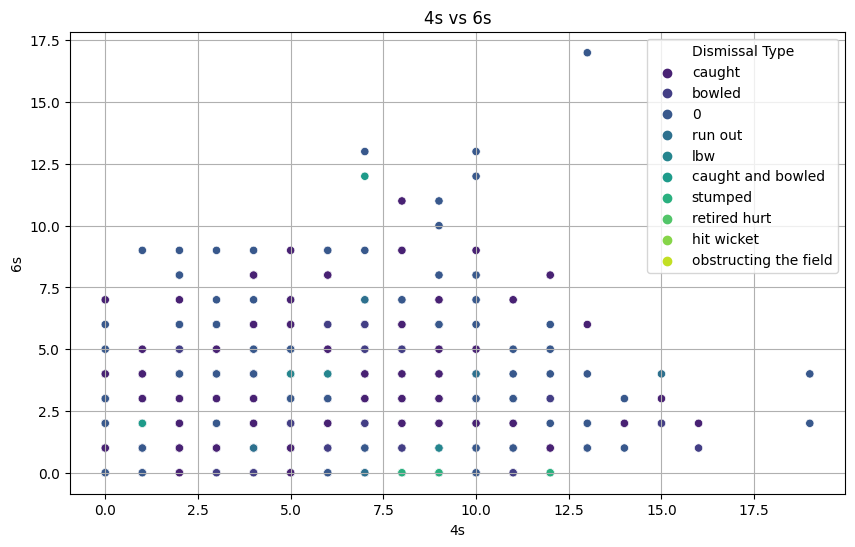

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='4s', y='6s', hue='dismissal_type', palette='viridis')
plt.title('4s vs 6s')
plt.xlabel('4s')
plt.ylabel('6s')
plt.legend(title='Dismissal Type')
plt.grid(True)
plt.show()


##**Ploting** Dismissal Type

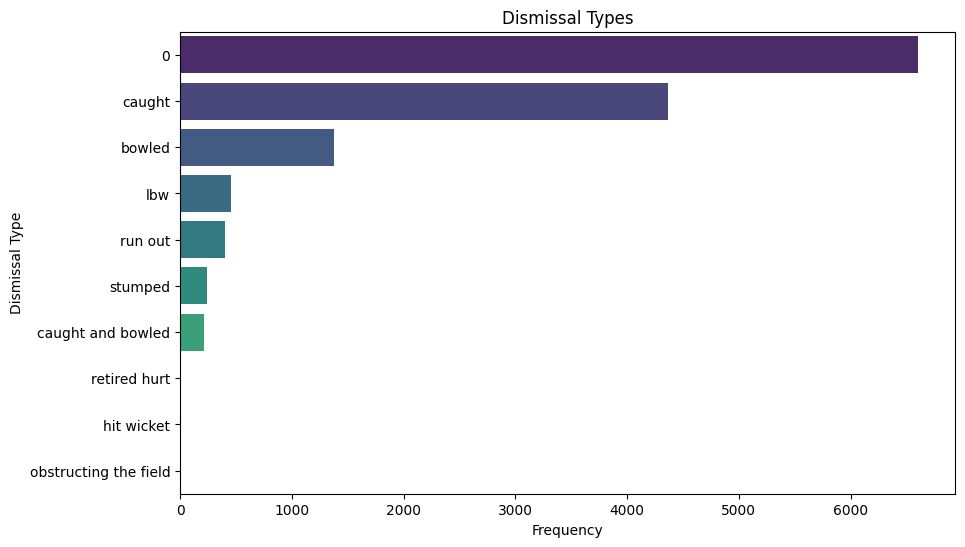

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='dismissal_type', order=data['dismissal_type'].value_counts().index, palette='viridis')
plt.title('Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()


##**Ploting** Histogram of Runs Scored

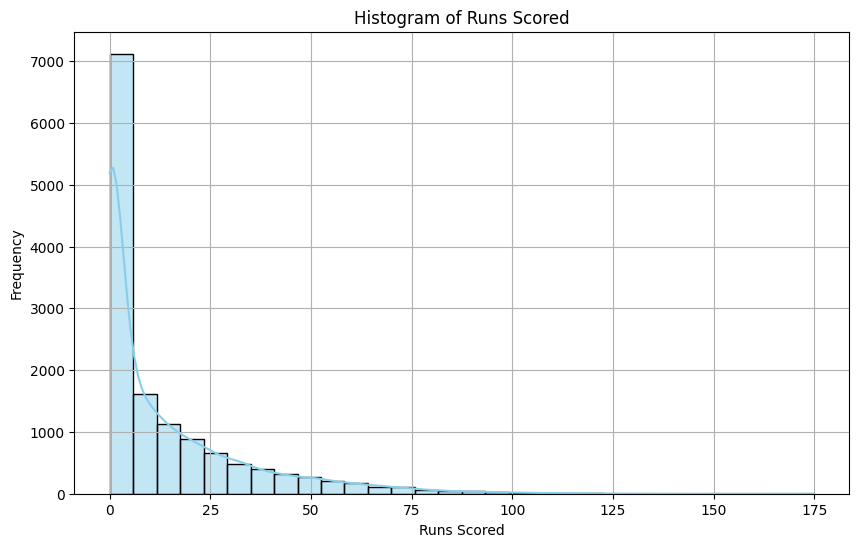

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['run_scored'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##**Ploting** Histograms for Numerical Features

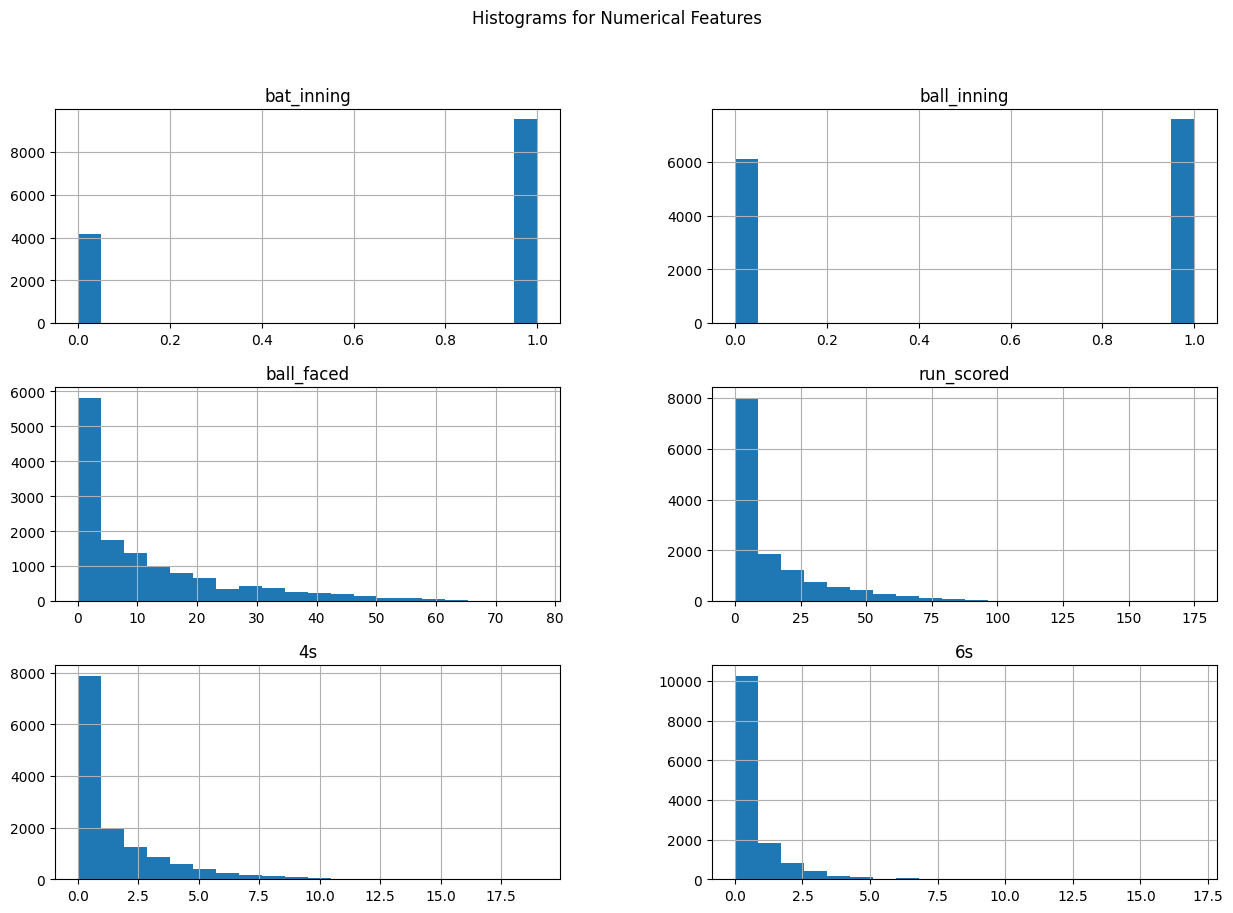

In [ ]:
numerical_features = ['bat_inning', 'ball_inning', 'ball_faced', 'run_scored', '4s', '6s']
data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Features')
plt.show()

##**Ploting** Correlation Matrix

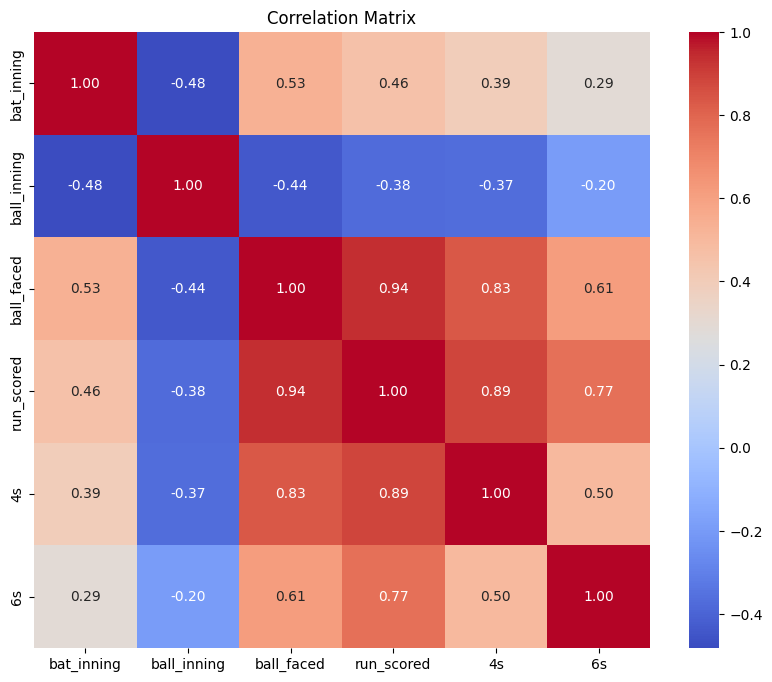

In [ ]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

##**Ploting** Count plot for feature

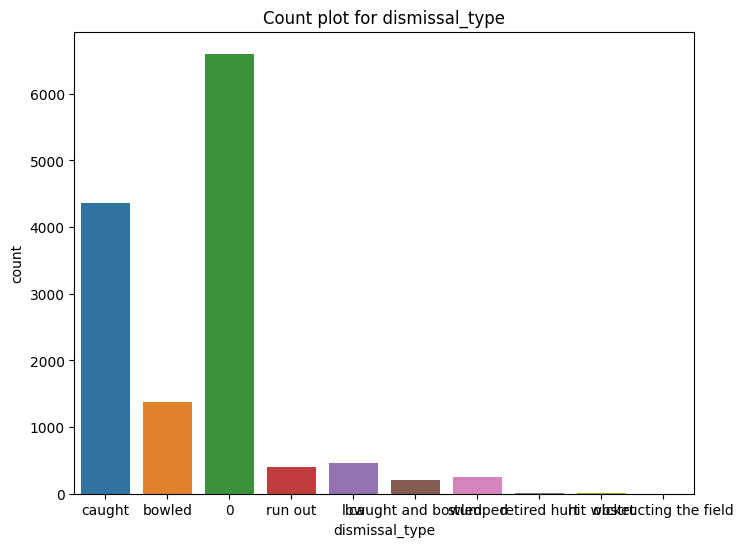

In [ ]:
categorical_features = ['dismissal_type']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Count plot for {feature}')
    plt.show()

## Making list of indivisul Players

In [ ]:
all_players = data['player'].tolist()
all_players

['DA Warner',
 'S Dhawan',
 'MC Henriques',
 'Yuvraj Singh',
 'DJ Hooda',
 'BCJ Cutting',
 'CJ Jordan',
 'Bipul Sharma',
 'Rashid Khan',
 'B Kumar',
 'A Nehra',
 'CH Gayle',
 'Mandeep Singh',
 'KM Jadhav',
 'Sachin Baby',
 'STR Binny',
 'TM Head',
 'SR Watson',
 'S Aravind',
 'YS Chahal',
 'A Choudhary',
 'TS Mills',
 'PA Patel',
 'JC Buttler',
 'RG Sharma',
 'N Rana',
 'AT Rayudu',
 'KH Pandya',
 'KA Pollard',
 'HH Pandya',
 'TG Southee',
 'MJ McClenaghan',
 'JJ Bumrah',
 'AM Rahane',
 'MA Agarwal',
 'SPD Smith',
 'MS Dhoni',
 'R Bhatia',
 'A Zampa',
 'Imran Tahir',
 'BA Stokes',
 'DL Chahar',
 'AB Dinda',
 'JJ Roy',
 'BB McCullum',
 'SK Raina',
 'AJ Finch',
 'KD Karthik',
 'DR Smith',
 'SB Jakati',
 'S Kaushik',
 'MS Gony',
 'DS Kulkarni',
 'P Kumar',
 'G Gambhir',
 'CA Lynn',
 'YK Pathan',
 'Kuldeep Yadav',
 'CR Woakes',
 'SP Narine',
 'PP Chawla',
 'TA Boult',
 'AM Rahane',
 'MA Agarwal',
 'SPD Smith',
 'BA Stokes',
 'MS Dhoni',
 'MK Tiwary',
 'DT Christian',
 'R Bhatia',
 'RD Chah

## Cheking for the Null Values

In [ ]:
print('is the tain have null: \n'+ str(data.isnull().sum()))

is the tain have null: 
match_id          0
inning            0
player_id         0
player            0
bat_inning        0
ball_inning       0
ball_faced        0
run_scored        0
4s                0
6s                0
50s               0
100s              0
ball_delivered    0
run_given         0
wicket            0
catch             0
stump             0
run_out           0
dismissed_by      0
dismissal_type    0
dream11_score     0
dtype: int64


## Cheking the Shape

In [ ]:
data.shape

(13676, 21)

## Selecting Featers

In [ ]:
Selected_Featers = [
                    'inning',
                    'player',
                    'bat_inning',
                    'ball_inning',
                    'ball_faced',
                    'run_scored',
                    '4s',
                    '6s',
                    '50s',
                    '100s',
                    'ball_delivered',
                    'run_given',
                    'wicket',
                    'catch',
                    'stump',
                    'run_out',
                    'dismissed_by',
                    'dismissal_type',
                    'dream11_score'
                    ]
X = data[Selected_Featers].values
print(f"Shape of selected Featers: {X.shape}")
print(f"Printing Selected Featers Valus: {[_ for _ in X][0:3]}")

Shape of selected Featers: (13676, 19)
Printing Selected Featers Valus: [array([0, 'DA Warner', 1, 0, 9, 14, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       'A Choudhary', 'caught', 34], dtype=object), array([0, 'S Dhawan', 1, 0, 31, 40, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       'STR Binny', 'caught', 45], dtype=object), array([0, 'MC Henriques', 1, 1, 37, 52, 3, 2, 1, 0, 13, 20, 1, 2, 0, 0,
       'YS Chahal', 'caught', 106], dtype=object)]


In [ ]:
data_numeric = data.drop(['player', 'dismissed_by', 'dismissal_type'], axis=1)

##Scaleing  the numeric features

In [ ]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(data_numeric)

## Convert the scaled features to a DataFrame

In [ ]:
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=data_numeric.columns)

## Concatenate the 'player' column back to the scaled features

In [ ]:
X_processed = pd.concat([data['player'], X_numeric_scaled_df], axis=1)

##Defining the NuralNet

In [ ]:
class CricketTeamNetRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(CricketTeamNetRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        out = self.softmax(out)
        return out

In [ ]:
input_features = X_processed.drop('player', axis=1).values
input_features

array([[-1.7274271 , -0.99358594, -1.02758461, ..., -0.11826899,
         0.        ,  0.10355663],
       [-1.7274271 , -0.99358594,  0.84370632, ..., -0.11826899,
         0.        ,  0.45756849],
       [-1.7274271 , -0.99358594,  0.01886097, ..., -0.11826899,
         0.        ,  2.42072513],
       ...,
       [ 1.72602731,  1.00645547,  1.18841781, ..., -0.11826899,
         0.        , -0.50791839],
       [ 1.72602731,  1.00645547, -1.15685142, ..., -0.11826899,
         0.        ,  2.35635934],
       [ 1.72602731,  1.00645547,  0.81292851, ..., -0.11826899,
         0.        ,  0.61848296]])

In [ ]:
input_size = input_features.shape[1]
hidden_size = 128
output_size = 11

## Spliting data into training and testing sets

In [ ]:
y = X_processed['player'].values
X_train, X_test, y_train, y_test = train_test_split(input_features, y, test_size=0.2, random_state=42)

## Converting player names to unique numerical IDs

In [ ]:
player_to_id = {player: idx for idx, player in enumerate(set(all_players))}
y_train_ids = [player_to_id[player] for player in y_train]
y_test_ids = [player_to_id[player] for player in y_test]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Converting to PyTorch tensors

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_ids, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_ids, dtype=torch.long).to(device)

## Defineing DataLoader for training and testing data

In [ ]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Assuming unique_players is a list of all unique player IDs

In [ ]:
unique_players = set(y_train_ids + y_test_ids)
output_size = len(unique_players)
print(f"Unique player ID's {unique_players}")

Unique player ID's {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

# Defineing model, loss function, and optimizer

In [ ]:
output_size = len(unique_players)
model = CricketTeamNetRNN(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

In [ ]:
print(model)

CricketTeamNetRNN(
  (rnn): RNN(18, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=500, bias=True)
  (softmax): Softmax(dim=1)
)


In [ ]:
input_size_tuple = (1, input_size)
summary(model, input_size=input_size_tuple, device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
               RNN-1  [[-1, 1, 128], [-1, 2, 128]]               0
            Linear-2                  [-1, 500]          64,500
           Softmax-3                  [-1, 500]               0
Total params: 64,500
Trainable params: 64,500
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.24
Params size (MB): 0.25
Estimated Total Size (MB): 0.49
----------------------------------------------------------------


## Training loop

In [ ]:
train_losses = []
num_epochs = 700

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.unsqueeze(1)
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        if (i+1) % 100 == 0:
            avg_loss = total_loss / 100
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {avg_loss:.4f}')
            train_losses.append(avg_loss)
            total_loss = 0


Epoch [1/700], Step [100/342], Loss: 6.2146
Epoch [1/700], Step [200/342], Loss: 6.2146
Epoch [1/700], Step [300/342], Loss: 6.2146
Epoch [2/700], Step [100/342], Loss: 6.2146
Epoch [2/700], Step [200/342], Loss: 6.2146
Epoch [2/700], Step [300/342], Loss: 6.2146
Epoch [3/700], Step [100/342], Loss: 6.2145
Epoch [3/700], Step [200/342], Loss: 6.2145
Epoch [3/700], Step [300/342], Loss: 6.2145
Epoch [4/700], Step [100/342], Loss: 6.2145
Epoch [4/700], Step [200/342], Loss: 6.2145
Epoch [4/700], Step [300/342], Loss: 6.2145
Epoch [5/700], Step [100/342], Loss: 6.2145
Epoch [5/700], Step [200/342], Loss: 6.2145
Epoch [5/700], Step [300/342], Loss: 6.2144
Epoch [6/700], Step [100/342], Loss: 6.2144
Epoch [6/700], Step [200/342], Loss: 6.2144
Epoch [6/700], Step [300/342], Loss: 6.2144
Epoch [7/700], Step [100/342], Loss: 6.2144
Epoch [7/700], Step [200/342], Loss: 6.2144
Epoch [7/700], Step [300/342], Loss: 6.2143
Epoch [8/700], Step [100/342], Loss: 6.2143
Epoch [8/700], Step [200/342], L

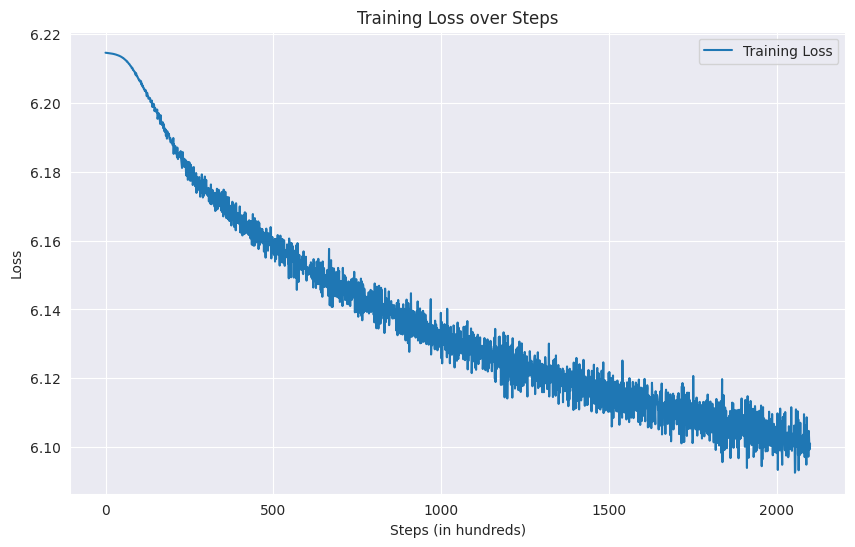

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Steps (in hundreds)')
plt.ylabel('Loss')
plt.title('Training Loss over Steps')
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/project/cricket_team_model.pth')

## Function to generate the team based on predictions

In [ ]:
def generate_team_rnn(model, input_features, all_players):
    model.load_state_dict(torch.load('/content/drive/MyDrive/project/cricket_team_model.pth'))
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(input_features, dtype=torch.float32)

        input_tensor = input_tensor.unsqueeze(1)
        output = model(input_tensor)
        _, indices = torch.topk(output, k=11)

        selected_players = [all_players[i] for i in indices[0]]

    return selected_players


In [ ]:
for team in range(0, 2):
    input_features_example = np.random.rand(1, input_size)
    input_features_tensor = torch.tensor(input_features_example, dtype=torch.float32).to(device)
    print(f"Example Input Features {input_features_tensor}")
    selected_players_example = generate_team_rnn(model, input_features_tensor, all_players)
    print(f"Number of members of Team {team + 1}: {len(selected_players_example)}")
    print(f"Selected Players of Team {team + 1}: {selected_players_example}")

    table = PrettyTable()
    table.field_names = ["Selected Players"]

    for player in selected_players_example:
        table.add_row([player])

    print(f"Team {team + 1}:")
    print(table)
    print()

Example Input Features tensor([[0.7211, 0.5384, 0.1392, 0.6125, 0.4817, 0.9758, 0.3364, 0.1818, 0.2644,
         0.3955, 0.0184, 0.9365, 0.2115, 0.3193, 0.3254, 0.0279, 0.8723, 0.4985]],
       device='cuda:0')
Number of members of Team 1: 11
Selected Players of Team 1: ['HM Amla', 'RV Uthappa', 'KD Karthik', 'S Aravind', 'SK Raina', 'AJ Tye', 'Kuldeep Yadav', 'P Kumar', 'CR Woakes', 'BB McCullum', 'MJ McClenaghan']
Team 1:
+------------------+
| Selected Players |
+------------------+
|     HM Amla      |
|    RV Uthappa    |
|    KD Karthik    |
|    S Aravind     |
|     SK Raina     |
|      AJ Tye      |
|  Kuldeep Yadav   |
|     P Kumar      |
|    CR Woakes     |
|   BB McCullum    |
|  MJ McClenaghan  |
+------------------+

Example Input Features tensor([[0.4569, 0.8976, 0.9434, 0.7969, 0.3631, 0.1758, 0.0733, 0.5483, 0.3672,
         0.7316, 0.8940, 0.3219, 0.5717, 0.2712, 0.3560, 0.8531, 0.2848, 0.9121]],
       device='cuda:0')
Number of members of Team 2: 11
Selected Play

<ipython-input-71-dcbc42d9445d>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_features, dtype=torch.float32)
